<a href="https://colab.research.google.com/github/hildj/DS3001_TeamM_Project/blob/main/EDA_Plots_DS_3001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/hildj/DS3001_TeamM_Project

Cloning into 'DS3001_TeamM_Project'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 140 (delta 59), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (140/140), 2.89 MiB | 5.24 MiB/s, done.
Resolving deltas: 100% (59/59), done.


<Figure size 1000x600 with 0 Axes>

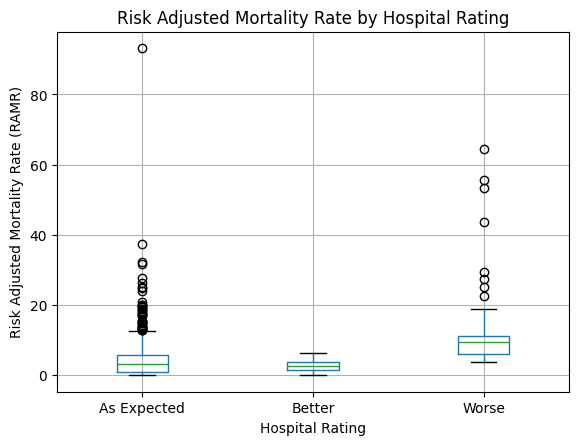

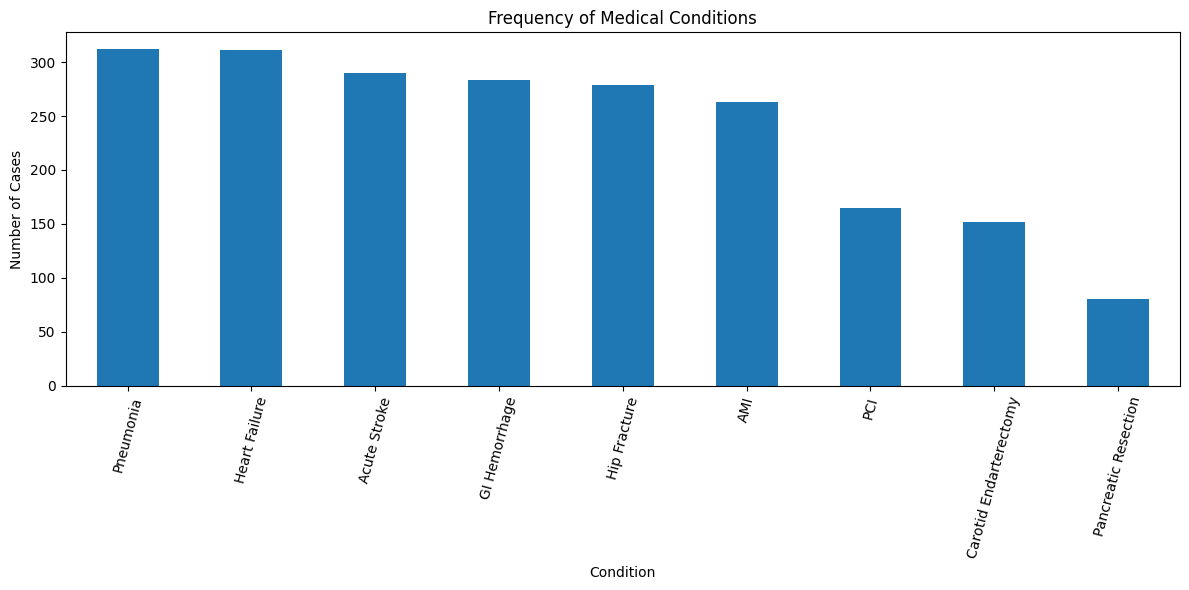

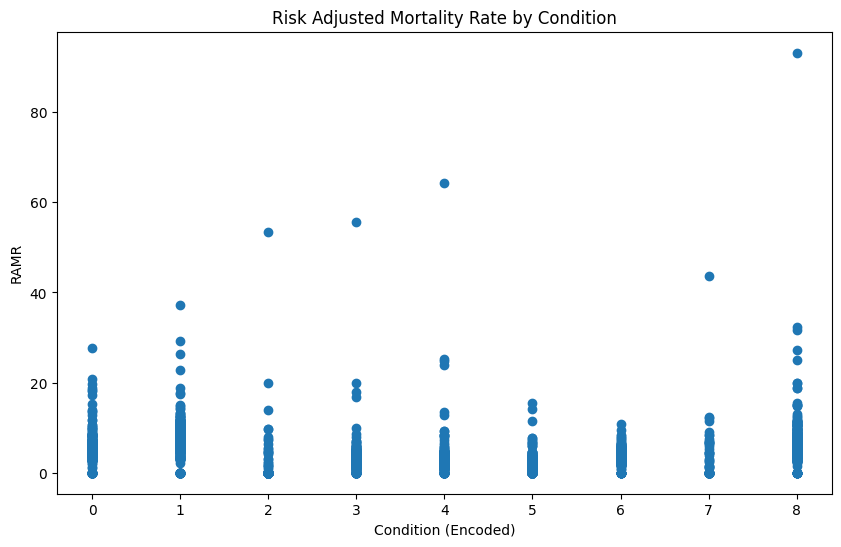

In [4]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('DS3001_TeamM_Project/data/hospital data cleaned.csv')


df = df.rename(columns={
    'Procedure/Condition': 'Condition',
    'Risk Adjuested Mortality Rate': 'RAMR',
    'Hospital Ratings': 'Rating'
})


# Graph 1: RAMR by Hospital Rating
plt.figure(figsize=(10,6))
df.boxplot(column='RAMR', by='Rating')
plt.title("Risk Adjusted Mortality Rate by Hospital Rating")
plt.suptitle("")  # removes duplicate title
plt.xlabel("Hospital Rating")
plt.ylabel("Risk Adjusted Mortality Rate (RAMR)")
plt.show()


# Graph 2: Frequency of Conditions
plt.figure(figsize=(12,6))
df['Condition'].value_counts().plot(kind='bar')
plt.title("Frequency of Medical Conditions")
plt.xlabel("Condition")
plt.ylabel("Number of Cases")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


# Graph 3: RAMR by Condition
plt.figure(figsize=(10,6))
condition_codes = df['Condition'].astype('category').cat.codes
plt.scatter(condition_codes, df['RAMR'])
plt.title("Risk Adjusted Mortality Rate by Condition")
plt.xlabel("Condition (Encoded)")
plt.ylabel("RAMR")
plt.show()

#Basic statistics for Risk Adjusted Mortality Rate (Below)


In [5]:
ramr_stats = df['RAMR'].describe()
ramr_stats


,RAMR
count,2135.000000
mean,4.196862
std,4.904603
min,0.000000
25%,1.200000
50%,3.400000
75%,5.900000
max,93.200000


In [6]:
rating_counts = df['Rating'].value_counts()
rating_counts


,count
Rating,
As Expected,1911
Worse,120
Better,95


In [7]:
condition_counts = df['Condition'].value_counts()
condition_counts


,count
Condition,
Pneumonia,312
Heart Failure,311
Acute Stroke,290
GI Hemorrhage,283
Hip Fracture,279
AMI,263
PCI,165
Carotid Endarterectomy,152
Pancreatic Resection,80


In [8]:
condition_counts.head(10)


,count
Condition,
Pneumonia,312
Heart Failure,311
Acute Stroke,290
GI Hemorrhage,283
Hip Fracture,279
AMI,263
PCI,165
Carotid Endarterectomy,152
Pancreatic Resection,80


In [11]:
key_vars_table = df[['HOSPITAL', 'Rating', 'Condition', 'RAMR']].head()
key_vars_table

,HOSPITAL,Rating,Condition,RAMR
0,Adventist Health and Rideout,As Expected,AMI,7.0
1,Adventist Health and Rideout,As Expected,Acute Stroke,5.3
2,Adventist Health and Rideout,As Expected,Carotid Endarterectomy,3.1
3,Adventist Health and Rideout,As Expected,GI Hemorrhage,2.2
4,Adventist Health and Rideout,As Expected,Heart Failure,4.0


In [12]:
df.corr(numeric_only=True)


,YEAR,RAMR,Risk Adjuested Mortality Rate.1
YEAR,NaN,NaN,NaN
RAMR,NaN,1.0,1.0
Risk Adjuested Mortality Rate.1,NaN,1.0,1.0


In [14]:
import pandas as pd

# Load your dataset
df = pd.read_csv('DS3001_TeamM_Project/data/hospital data cleaned.csv')

# Standardize column names if needed
df = df.rename(columns={
    'Procedure/Condition': 'Condition',
    'Risk Adjuested Mortality Rate': 'RAMR',
    'Hospital Ratings': 'Rating',
    'Hospital': 'Hospital Name',
    'Case Volume': 'Cases',
    'Number of Cases': 'Cases'
})

# Pick only columns that exist (avoids errors)
possible_cols = ['Hospital Name', 'Rating', 'Condition', 'Cases', 'RAMR']
key_cols = [c for c in possible_cols if c in df.columns]

# Create sample table with first 5 rows
sample_table = df[key_cols].head()

# Display
sample_table

sample_table.style.set_caption("Sample Table of Key Variables")


,Rating,Condition,RAMR
0,As Expected,AMI,7.000000
1,As Expected,Acute Stroke,5.300000
2,As Expected,Carotid Endarterectomy,3.100000
3,As Expected,GI Hemorrhage,2.200000
4,As Expected,Heart Failure,4.000000


# Data Overview
Feature and Target Variables

To analyze how hospital characteristics relate to patient outcomes, we structured the dataset into clearly defined predictors and outcomes:

Feature Variables (Predictors):

Hospital Rating (categorical): Better, Average, Worse

Medical Condition (categorical): Includes pneumonia, heart failure, acute stroke types, hip fracture, carotid endarterectomy, PCI, pancreatic conditions, and others

Hospital ID (optional control)

Case Volume (number of cases per condition per hospital, if included)

Target Variable (Outcomes):

Risk Adjusted Mortality Rate (RAMR): A continuous measure of mortality per 100 cases, adjusted for clinical risk.

These variables allow both categorical and numeric modeling, making the dataset suitable for linear models, trees, and distance-based methods.

# Model Comparisons

Linear Regression

The linear regression models provided a clear, interpretable baseline. Hospital rating and condition were both statistically significant predictors, with “better” hospitals showing meaningfully lower RAMR and high-risk conditions showing higher RAMR. However, linear models captured only broad trends and left unexplained variance due to nonlinear clinical relationships.

Decision Tree

The decision tree model captured nonlinear patterns and produced clear splits showing which conditions and ratings most strongly drive mortality. Trees modeled interactions naturally kike for example, identifying that certain conditions only lead to high RAMR in hospitals with low ratings. However, trees risk overfitting, especially with many rare conditions, requiring pruning to improve generalization.

KNN Regression

KNN regression modeled RAMR using localized similarity among hospitals. The model performed best at moderate K values (around 12–15), balancing noise and bias. KNN captured clusters of similar procedures well but struggled with rare or high-mortality conditions where few close neighbors exist. Residual plots showed the model is generally unbiased with some outliers for extreme cases.